<a href="https://colab.research.google.com/github/GaboLara998/ProyectoIntegrador/blob/main/ProyectoIntregrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segundo enfoque

In [1]:
# Librerías para el manejo de datos
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Algoritmos de aprendizaje automático
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.semi_supervised import LabelSpreading
import xgboost as xgb
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from keras.layers import Input, Dense
from keras.models import Model

# Métricas de rendimiento
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix

# Utilidades para la visualización de datos
import numpy as np

In [2]:
#Funcion de cargar datasets
def cargar_datos(link):
    datos = pd.read_csv(link,index_col='id')
    return datos

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

#Links datasets
link_training = "https://raw.githubusercontent.com/GaboLara998/ProyectoIntegrador/main/DataSet_UNSW_NB15/UNSW_NB15_training-set.csv?token=GHSAT0AAAAAACMBWAOFBU5CFZ67HIDC2XLOZO7JZMA"
link_testing = "https://raw.githubusercontent.com/GaboLara998/ProyectoIntegrador/main/DataSet_UNSW_NB15/UNSW_NB15_testing-set.csv?token=GHSAT0AAAAAACMBWAOFEFKXDJN42NYN2ZDAZO7JXNA"


# Cargar los datos
datos_training = cargar_datos(link_training)
datos_testing = cargar_datos(link_testing)


# Crear un dataset mas grande
dataFinal = pd.concat([datos_training,datos_testing])
dataFinal = dataFinal.reset_index(drop=True)


In [ ]:
#Obtener los tipos de ataques del dataset
dataFinal.attack_cat.unique()

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [3]:
#Transformar las columnas de tipo string a categoricas
for col in ['proto', 'service', 'state']:
    dataFinal[col] = dataFinal[col].astype('category').cat.codes


dataFinal['attack_cat'] = dataFinal['attack_cat'].astype('category')
#Se mantiene las columnas de ataque

Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Normal                0
Name: attack_cat, dtype: int64


<Axes: ylabel='attack_cat'>

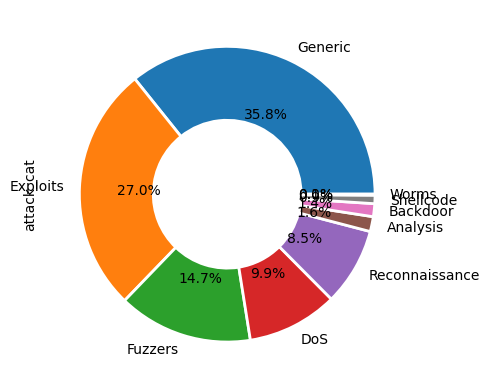

In [4]:
#Recorrer los diferentes tipos de ataques
print(dataFinal[dataFinal['label']==1]
     ['attack_cat']
     .value_counts()
)
#grafica de pastel del tipo de ataques
dataFinal[dataFinal['label']==1]['attack_cat'].value_counts()\
    .plot\
    .pie(autopct='%1.1f%%',wedgeprops={'linewidth': 2, 'edgecolor': 'white', 'width': 0.50})

In [5]:
#Se divide el dataset en las variables y la clase de salida
X = dataFinal.loc[:, ~dataFinal.columns.isin(['attack_cat', 'label'])]
y = dataFinal['label'].values

#Crear un 30% de testing y 70% de training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# Obtener la lista de variables
feature_names = list(X.columns)

# Imprimir la forma de los datos de entrenamiento y prueba
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

print(feature_names)

X_train shape:  (180371, 42)
y_train shape:  (180371,)
X_test shape:  (77302, 42)
y_test shape:  (77302,)
['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']


In [6]:
#Definir conjunto de parametros
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

#Clasificador Decision Tree
dt = DecisionTreeClassifier()

# Se usa GridSearchCV para encontrar los mejores parametros
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

#Imprimir los mejores parametros y mejor puntaje de recall
print("Best parameters:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best recall score: 1.0


In [7]:
clf=grid_search.best_estimator_

y_pred = clf.predict(X_test)

# Calcula el puntaje de recall del modelo
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

Recall:  1.0


In [8]:
!pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.3 MB/s eta 0:00:00


Regla para un valor alto de recall |--- sttl <= 61.00
|   |--- sinpkt <= 0.00
|   |   |--- class: 1
|   |--- sinpkt >  0.00
|   |   |--- class: 0
|--- sttl >  61.00
|   |--- synack <= 0.04
|   |   |--- class: 1
|   |--- synack >  0.04
|   |   |--- class: 1



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


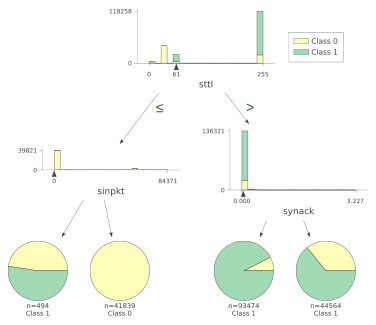

In [9]:
# graficar el árbol
from sklearn.tree import export_text
import dtreeviz

print("Regla para un valor alto de recall" ,export_text(clf,feature_names=feature_names))

# visualizar el árbol
viz_model = dtreeviz.model(clf,
                           X_train=X_train, y_train=y_train,
                           feature_names=feature_names)

v = viz_model.view(fancy=True)     # renderizar como SVG en un objeto
v

In [10]:
X_test = X_test.reset_index(drop=True)

# Definir las reglas adaptadas
rules = "(sttl <= 61.00 & sinpkt<= 0.00) | (sttl >  61.00 )"

# Obtener los índices de los registros que cumplen las reglas
ind = X_test.query(rules).index

# Filtrar el conjunto de prueba (tanto X_test como y_test)
X_test_2 = X_test.loc[ind,:]
y_test_2 = y_test[ind]

print(X_test.shape)
print(X_test_2.shape)
print("Porcentaje de datos filtrados:", (1 - np.round(X_test_2.shape[0] / X_test.shape[0], 2)) * 100, "%")


(77302, 42)
(59265, 42)
Porcentaje de datos filtrados: 23.0 %


In [ ]:
# Crear un modelo de Random Forest
rf = RandomForestClassifier(random_state=123)

# Entrenar el modelo con los datos de entrenamiento
rf.fit(X_train, y_train)

# Realizar predicciones sobre los datos de prueba filtrados
y_pred = rf.predict(X_test_2)

# Calcular la precisión, el recall, la precisión y el AUC del modelo
acc = accuracy_score(y_test_2, y_pred)
rec = recall_score(y_test_2, y_pred)
per = precision_score(y_test_2, y_pred)
auc = roc_auc_score(y_test_2, y_pred)

print("Recall: ", rec)
print("Precisión: ", per)
print("Precisión: ", acc)
print("AUC: ", auc)


Recall:  0.9596018853802116
Percision:  0.9647738366417182
Accuracy:  0.9510546418680352
AUC:  0.9474319511374407


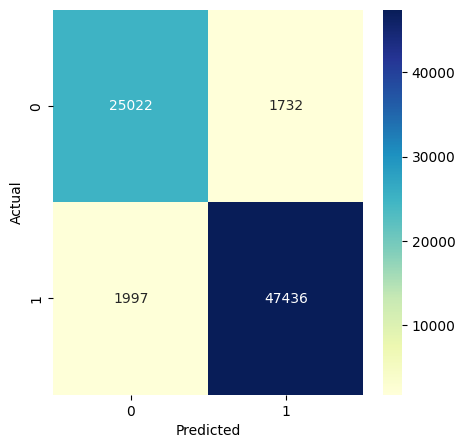

In [ ]:
cross = pd.crosstab(pd.Series(y_test_2, name='Actual'), pd.Series(y_pred, name='Predicted'))
plt.figure(figsize=(5, 5))
sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
plt.show()

<ipython-input-49-ac5ecb3d4784>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
<ipython-input-49-ac5ecb3d4784>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

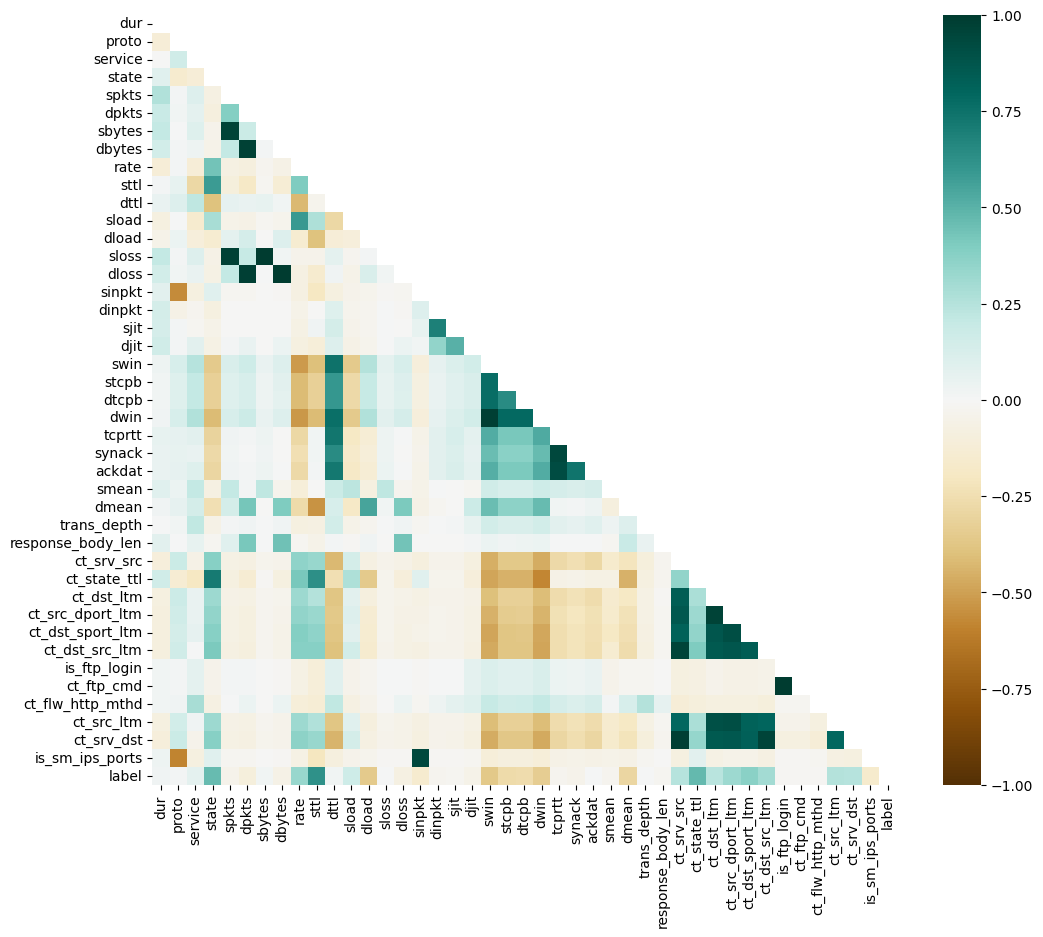

In [ ]:
#Crear la matriz de correlacion
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(dataFinal.corr(), dtype=bool))
sns.heatmap(dataFinal.corr(),vmin=-1, vmax=1,cmap='BrBG', mask=mask)

In [ ]:
# Creación del DataFrame de clasificación
feature_imp = pd.DataFrame({'Nombre': X.columns, 'Importancia': rf.feature_importances_})

# Ordenar las características según su valor de importancia
feature_imp = feature_imp.sort_values('Importancia', ascending=False).reset_index(drop=True)

# Mostrar solo las 10 características más importantes con un estilo de gradiente de colores
feature_imp[:10].style.background_gradient()

,Name,Importance
0,sttl,0.145638
1,ct_state_ttl,0.106553
2,dload,0.050570
3,sload,0.049528
4,rate,0.048202
5,smean,0.040595
6,sbytes,0.040532
7,ct_dst_src_ltm,0.038633
8,dttl,0.038604
9,ct_srv_dst,0.035995


<Axes: >

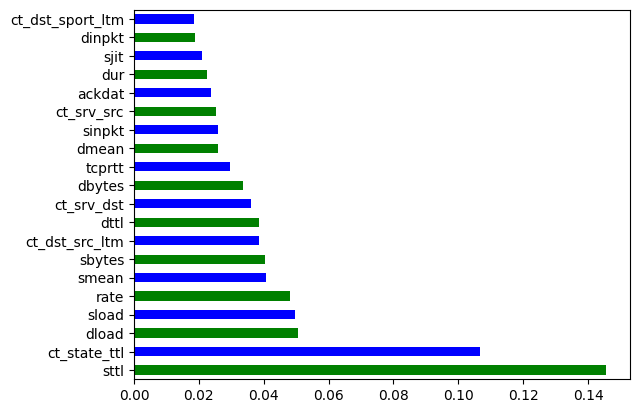

In [ ]:
# Graficar las características más importantes
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', color=['g', 'b'] * 5)

In [ ]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from keras.layers import Input, Dense
from keras.models import Model

# Entrenar y evaluar Isolation Forest
if_model = IsolationForest()
if_model.fit(X_train)
if_predictions = if_model.predict(X_test)
if_labels = np.where(if_predictions == -1, 1, 0)  # Anomalía es -1

# Entrenar y evaluar One-Class SVM
svm_model = OneClassSVM()
svm_model.fit(X_train)
svm_predictions = svm_model.predict(X_test)
svm_labels = np.where(svm_predictions == -1, 1, 0)

# Entrenar Autoencoder
input_dim = X_train.shape[1]
encoding_dim = 32

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Evaluar Autoencoder
autoencoder_predictions = autoencoder.predict(X_test)
autoencoder_losses = np.mean(np.square(X_test - autoencoder_predictions), axis=1)
autoencoder_labels = np.where(autoencoder_losses > np.mean(autoencoder_losses), 1, 0)

Epoch 1/10
5637/5637 [==============================] - 14s 2ms/step - loss: 138155250937757696.0000 - val_loss: 136953149721149440.0000
Epoch 2/10
5637/5637 [==============================] - 16s 3ms/step - loss: 138154907340374016.0000 - val_loss: 136953149721149440.0000
Epoch 3/10
5637/5637 [==============================] - 15s 3ms/step - loss: 138155311067299840.0000 - val_loss: 136953149721149440.0000
Epoch 4/10
5637/5637 [==============================] - 13s 2ms/step - loss: 138155285297496064.0000 - val_loss: 136953149721149440.0000
Epoch 5/10
5637/5637 [==============================] - 13s 2ms/step - loss: 138154898750439424.0000 - val_loss: 136953149721149440.0000
Epoch 6/10
5637/5637 [==============================] - 15s 3ms/step - loss: 138154787081289728.0000 - val_loss: 136953149721149440.0000
Epoch 7/10
5637/5637 [==============================] - 13s 2ms/step - loss: 138154976059850752.0000 - val_loss: 136953149721149440.0000
Epoch 8/10
5637/5637 [===================


Random Forest:
Accuracy: 0.9517606271506559
Precision: 0.9647738366417182
Recall: 0.9596018853802116
AUC: 0.9487269895522106


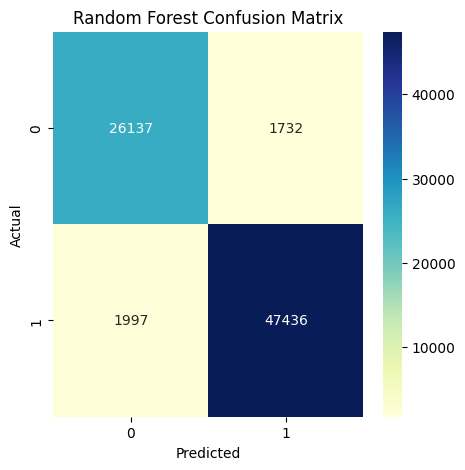

In [ ]:
# Entrenar y evaluar Random Forest
rf = RandomForestClassifier(random_state=123)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, y_pred_rf))


plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")

Isolation Forest:
Accuracy: 0.36812760342552586
Precision: 0.6051502145922747
Recall: 0.034228147189124675
AUC: 0.4973071196313774

One-Class SVM:
Accuracy: 0.32156994644381776
Precision: 0.4609011816647189
Recall: 0.35901118685898087
AUC: 0.3070846238934468

Autoencoder:
Accuracy: 0.33915034539856664
Precision: 0.4694797516996748
Recall: 0.25703477434102723
AUC: 0.3709193391601796


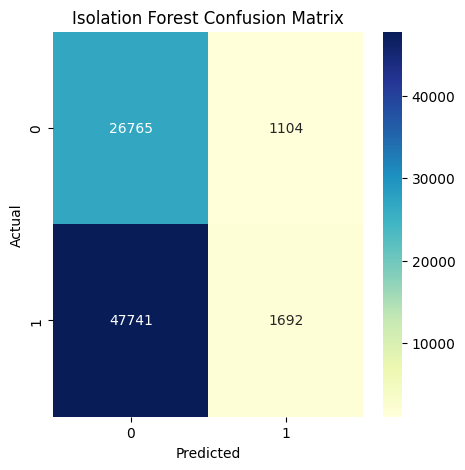

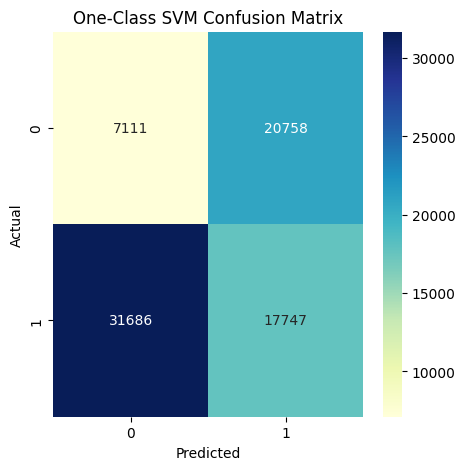

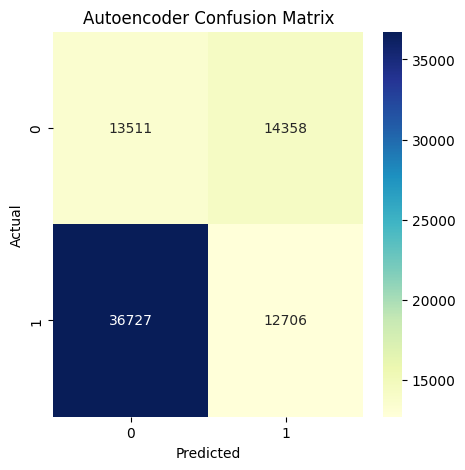

In [ ]:
# Calcular métricas de rendimiento
print("Isolation Forest:")
print("Accuracy:", accuracy_score(y_test, if_labels))
print("Precision:", precision_score(y_test, if_labels))
print("Recall:", recall_score(y_test, if_labels))
print("AUC:", roc_auc_score(y_test, if_labels))

print("\nOne-Class SVM:")
print("Accuracy:", accuracy_score(y_test, svm_labels))
print("Precision:", precision_score(y_test, svm_labels))
print("Recall:", recall_score(y_test, svm_labels))
print("AUC:", roc_auc_score(y_test, svm_labels))

print("\nAutoencoder:")
print("Accuracy:", accuracy_score(y_test, autoencoder_labels))
print("Precision:", precision_score(y_test, autoencoder_labels))
print("Recall:", recall_score(y_test, autoencoder_labels))
print("AUC:", roc_auc_score(y_test, autoencoder_labels))

plot_confusion_matrix(y_test, if_labels, "Isolation Forest Confusion Matrix")
plot_confusion_matrix(y_test, svm_labels, "One-Class SVM Confusion Matrix")
plot_confusion_matrix(y_test, autoencoder_labels, "Autoencoder Confusion Matrix")


In [ ]:
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, y_pred_rf))


# Entrenar y evaluar One-Class SVM
svm_model = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.1)
svm_model.fit(X_train)
svm_predictions = svm_model.predict(X_test)
svm_labels = np.where(svm_predictions == -1, 1, 0)




Random Forest:
Accuracy: 0.9517606271506559
Precision: 0.9647738366417182
Recall: 0.9596018853802116
AUC: 0.9487269895522106


KeyboardInterrupt: 

In [ ]:
# Calcular métricas de rendimiento


print("\nOne-Class SVM:")
print("Accuracy:", accuracy_score(y_test, svm_labels))
print("Precision:", precision_score(y_test, svm_labels))
print("Recall:", recall_score(y_test, svm_labels))
print("AUC:", roc_auc_score(y_test, svm_labels))

plot_confusion_matrix(y_test, svm_labels, "One-Class SVM Confusion Matrix")


K-Nearest Neighbors:
Accuracy: 0.8494734935706709
Precision: 0.8722302101593429
Recall: 0.8958388121295491
AUC: 0.8315356104495749


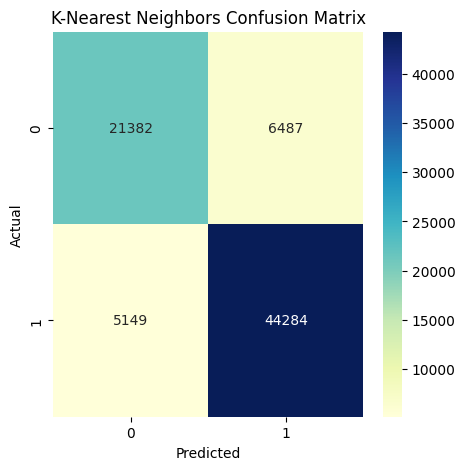

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Crear el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo
knn_model.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
knn_predictions = knn_model.predict(X_test)

# Calcular métricas de rendimiento
print("\nK-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Precision:", precision_score(y_test, knn_predictions))
print("Recall:", recall_score(y_test, knn_predictions))
print("AUC:", roc_auc_score(y_test, knn_predictions))

# Graficar la matriz de confusión
plot_confusion_matrix(y_test, knn_predictions, "K-Nearest Neighbors Confusion Matrix")


XGBoost:
Accuracy: 0.9475434012056609
Precision: 0.9649004179985247
Recall: 0.9526227418930674
AUC: 0.9455782983569179


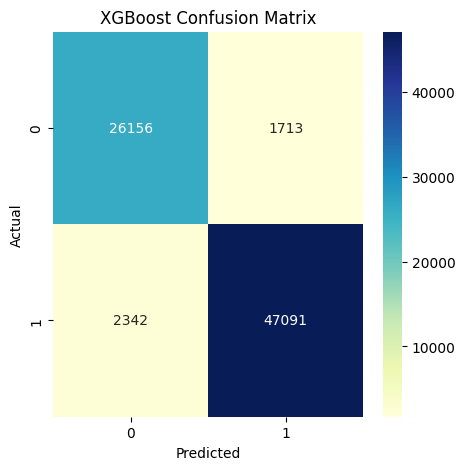

In [ ]:


# Crear el modelo XGBoost
xgb_model = xgb.XGBClassifier(random_state=123)

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
xgb_predictions = xgb_model.predict(X_test)

# Calcular métricas de rendimiento
print("\nXGBoost:")
print("Accuracy:", accuracy_score(y_test, xgb_predictions))
print("Precision:", precision_score(y_test, xgb_predictions))
print("Recall:", recall_score(y_test, xgb_predictions))
print("AUC:", roc_auc_score(y_test, xgb_predictions))

# Graficar la matriz de confusión
plot_confusion_matrix(y_test, xgb_predictions, "XGBoost Confusion Matrix")


In [ ]:
!pip install minisom

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:318: ConvergenceWarning: max_iter=30 was reached without convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer



Label Spreading:
Accuracy: 0.8277664226022613
Precision: 0.8634799235181644
Recall: 0.8678817793781483
AUC: 0.8122465339533105


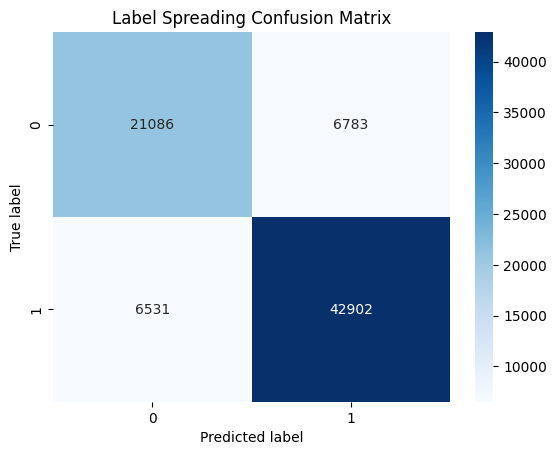

In [ ]:
# Crear el modelo KMeans
kmeans = KMeans(n_clusters=2, random_state=0)

# Entrenar el modelo
kmeans.fit(X_train)

# Hacer predicciones en los datos de prueba
kmeans_predictions = kmeans.predict(X_test)

# Supongamos que sólo una parte de tus datos está etiquetada
# Las etiquetas de los datos no etiquetados se representan como -1
labels = np.copy(y_train)
random_unlabeled_points = np.random.choice(len(labels), int(len(labels)*.7), replace=False)
labels[random_unlabeled_points] = -1

# Crear el modelo de propagación de etiquetas
label_propagation_model = LabelSpreading(kernel='knn', alpha=0.8)
label_propagation_model.fit(X_train, labels)

# Ahora el modelo ha sido entrenado utilizando tanto los datos etiquetados como los no etiquetados
# Puedes usarlo para hacer predicciones en nuevos datos
predictions = label_propagation_model.predict(X_test)

# Calcular métricas de rendimiento
print("\nLabel Spreading:")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("AUC:", roc_auc_score(y_test, predictions))

# Graficar la matriz de confusión
conf_mat = confusion_matrix(y_test, predictions)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Label Spreading Confusion Matrix")
plt.show()


In [ ]:
X_train.dtypes

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Inicializar el objeto StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

# Crear el modelo Random Forest
rf_model = RandomForestClassifier(random_state=123)
# Usar cross_val_score para realizar la validación cruzada
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=stratified_kfold)

# Imprimir la precisión media y la desviación estándar para Random Forest
print("Random Forest Accuracy: %0.5f (+/- %0.5f)" % (rf_scores.mean(), rf_scores.std() * 2))

# Crear el modelo K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=3)
# Usar cross_val_score para realizar la validación cruzada
knn_scores = cross_val_score(knn_model, X_train, y_train, cv=stratified_kfold)

# Imprimir la precisión media y la desviación estándar para K-Nearest Neighbors
print("K-Nearest Neighbors Accuracy: %0.5f (+/- %0.5f)" % (knn_scores.mean(), knn_scores.std() * 2))


Random Forest Accuracy: 0.94941 (+/- 0.00274)
K-Nearest Neighbors Accuracy: 0.84603 (+/- 0.00491)
